In [2]:
import numpy as np
from scipy.special import comb
from scipy.stats import fisher_exact

c:\Users\wr2zzgx\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Defining number of samples / runs
n = 31000

# Defining number of positive cases (1)
k = 63

# Defining probability of event happening
p = 0.00203

# Calculating binomial pmf
pmf = comb(n, k)*(p**k)*((1-p)**(n-k))

# Printing pmf
pmf

0.05024468664277072

In [26]:
#Importing libraries
import numpy as np
from scipy.stats import fisher_exact

# Creating a contingency table
contingency_table = np.array([[39, 63], [30961, 30937]])

# Calculating Fisher's exact test
statistic, pvalue = fisher_exact(contingency_table, alternative='less')

# Printing result
print(f"Statistics - prior odds ratio:{statistic} | p-value: {pvalue}")

Statistics - prior odds ratio:0.6185677526719483 | p-value: 0.011094091844052025


In [28]:
#Importing libraries
import numpy as np
from scipy.stats import norm

# Calculating probability of death in the control group
prob_c = 63/31000

# Calculating probability of death in the treatment group
prob_t = 39/31000

# Defining the sample size n
n = 31000

# Defining the standard deviation
sigma = np.sqrt(prob_c*(1-prob_c))

# Calculating z
z = (prob_t - prob_c)/(sigma/np.sqrt(n))

# Calculating the cumulative distribution function from -inf to z considering that
# z is a variable sampled from a normal distribution with mean 0 and variance 1 
pvalue = norm.cdf(z, loc=0, scale=1)

# Printing result
print(f"z statistic:{z} | p-value: {pvalue}")

z statistic:-3.0267929604748476 | p-value: 0.0012358159238705215


In [44]:
#Importing libraries
import numpy as np
from scipy.stats import t, ttest_1samp

# Defining the sample data
x = np.array([0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5])

# Calculating probability of death in the treatment group
x_bar = x.mean()

# Defining the sample size n
n = x.shape[0]

# Defining the standard deviation
sigma_hat = np.sqrt(np.sum((x - x_bar)**2)/(n-1))

# Defining mu
mu = 0

# Calculating t statistic for n-1 degrees of freedom
t_stat = (x_bar - mu)/(sigma_hat/(np.sqrt(n)))

# Calculating the cumulative distribution function from t to +inf considering that
# t is a variable sampled from a t distribution wiht mean 0 and standard deviation 1
pvalue = 1 - t.cdf(t_stat, df=n-1, loc=0, scale=1)

# Printing result
print(f"Xbar: {x_bar} | Sample size: {n} | Sigma hat: {sigma_hat} | t-stat: {t_stat} | p-value: {pvalue}")

# Using function ttest_1samp
t_stat, pvalue = ttest_1samp(a=x, popmean=mu, alternative='greater')

# Printing result
print(f"t-stat: {t_stat} | p-value: {pvalue}")

Xbar: 1.78 | Sample size: 10 | Sigma hat: 1.7681126158201075 | t-stat: 3.1835383022188735 | p-value: 0.0055606927492846125
t-stat: 3.1835383022188735 | p-value: 0.005560692749284678


In [68]:

#Importing libraries
import numpy as np
from scipy.stats import chi2, binom

# Number of deaths in the treatment set
k_T = 39

# Number of deaths in the control set
k_C = 63

# Number of patients in the treatment set
n_T = 31000

# Number of patients in the control set
n_C = 31000

# Maximum likelihood estimator and Probability Mass Function for the treatment set under the alternative hypothesis (HA): pMLE_T diff pMLE_C
pMLE_T = k_T/n_T
pmf_T = binom.pmf(k=k_T, n=n_T, p=pMLE_T, loc=0)
print(f"Maximum likelihood estimator (MLE) treatment: {pMLE_T} and Probability Mass Function (PMF) treatment: {pmf_T}")

: Maximum likelihood estimator (MLE) treatment: 0.0012580645161290322 and Probability Mass Function (PMF) treatment: 0.06378567544145823

# Maximum likelihood estimator and Probability Mass Function for the control set under the alternative hypothesis (HA): pMLE_T diff pMLE_C
pMLE_C = k_C/n_C
pmf_C = binom.pmf(k=k_C, n=n_C, p=pMLE_C, loc=0)
print(f"Maximum likelihood estimator (MLE) treatment: {pMLE_C} and Probability Mass Function (PMF) treatment: {pmf_C}")

: Maximum likelihood estimator (MLE) treatment: 0.002032258064516129 and Probability Mass Function (PMF) treatment: 0.05024664607042506

# Maximum likelihood estimator and Probability Mass Function for the control / treatment set under the null hypothesis (H0): pMLE_T = pMLE_C = pMLE
pMLE = (k_T + k_C)/(n_T + n_C)
pmf_p = binom.pmf(k=k_T, n=n_T, p=pMLE, loc=0)*binom.pmf(k=k_C, n=n_C, p=pMLE, loc=0)
print(f"Maximum likelihood estimator (MLE) treatment: {pMLE} and Probability Mass Function (PMF) treatment: {pmf_p}")

: Maximum likelihood estimator (MLE) treatment: 0.0016451612903225807 and Probability Mass Function (PMF) treatment: 0.00018449866030670578

# Calculating the likelihood ratio test statistic
LR_stat = -2*np.log(pmf_p/(pmf_T*pmf_C))
print(f"The likelihood ratio test statistic is {LR_stat}")

: The likelihood ratio test statistic is 5.709660479762178

# Calculating p-value assuming a Chi-Squared distribution for LR_stat
pvalue = 1 - chi2.cdf(x=LR_stat, df=1, loc=0, scale=1)
print(f"The p-value is {pvalue}")

: The p-value is 0.016871802195942753

Maximum likelihood estimator (MLE) treatment: 0.0012580645161290322 and Probability Mass Function (PMF) treatment: 0.06378567544145823
Maximum likelihood estimator (MLE) treatment: 0.002032258064516129 and Probability Mass Function (PMF) treatment: 0.05024664607042506
Maximum likelihood estimator (MLE) treatment: 0.0016451612903225807 and Probability Mass Function (PMF) treatment: 0.00018449866030670578
The likelihood ratio test statistic is 5.709660479762178
The p-value is 0.016871802195942753


In [75]:
# Creating Xs array
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])

# Creating Ys array
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])

# Storing the number of points
n = Xs.shape[0]

print(f"Xs mean: {Xs.mean()} Mpc and Ys mean: {Ys.mean()} km/s")

print(f"Xs standard deviation: {np.sqrt(np.sum((Xs-Xs.mean())**2)/(n-1))} Mpc and Ys standard deviation: {np.sqrt(np.sum((Ys-Ys.mean())**2)/(n-1))} km/s")

print(f"Covariance of Xs and Ys: {np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(n-1)}")

Xs mean: 0.9199250000000001 Mpc and Ys mean: 425.6175 km/s
Xs standard deviation: 0.6533948258734996 Mpc and Ys standard deviation: 348.7336574977229 km/s
Covariance of Xs and Ys: 191.20706528260868


In [77]:
# Creating Xs array
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])

# Creating Ys array
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])

# Storing the number of points
n = Xs.shape[0]

# Calculating Xs mean
Xs_mu = Xs.mean()

# Calculating Ys mean
Ys_mu = Ys.mean()

# Calculating Xs standard deviation
Xs_std = np.sqrt(np.sum((Xs-Xs.mean())**2)/(n-1))

# Calculating Ys standard deviation
Ys_std = np.sqrt(np.sum((Ys-Ys.mean())**2)/(n-1))

# Standard Xs
Xs_z = (Xs - Xs_mu)/Xs_std

# Standard Ys
Ys_z = (Ys - Ys_mu)/Ys_std

# Covariance between Xs and Ys
CovXY = np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(n-1)

# Correlation between Xs and Ys
rXY = np.sum(Xs_z*Ys_z)/(n-1)

results = f"""
Xs mean: {Xs_mu} Mpc
Ys mean: {Ys_mu} km/s
Xs standard deviation: {Xs_std} Mpc
Ys standard deviation: {Ys_std} km/s
Covariance between Xs and Ys: {CovXY} Mpc km/s
Correlation between Xs and Ys: {rXY} unitless
"""

print(results)


Xs mean: 0.9199250000000001 Mpc
Ys mean: 425.6175 km/s
Xs standard deviation: 0.6533948258734996 Mpc
Ys standard deviation: 348.7336574977229 km/s
Covariance between Xs and Ys: 191.20706528260868 Mpc km/s
Correlation between Xs and Ys: 0.8391399162310663 unitless



In [78]:
def correl(x, y):
    # Storing the number of points
    n = x.shape[0]

    # Calculating x mean
    x_mu = x.mean()

    # Calculating y mean
    y_mu = y.mean()

    # Calculating x standard deviation
    x_std = np.sqrt(np.sum((x-x.mean())**2)/(n-1))

    # Calculating y standard deviation
    y_std = np.sqrt(np.sum((y-y.mean())**2)/(n-1))

    # Standard x
    x_z = (x - x_mu)/x_std

    # Standard y
    y_z = (y - y_mu)/y_std

    # Correlation between x and y
    rxy = np.sum(x_z*y_z)/(n-1)

    return rxy



In [102]:
# Creating Xs array
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])

# Creating Ys array
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])

# Storing the number of points
n = Xs.shape[0]

# Calculating Xs mean
Xs_mu = Xs.mean()

# Calculating Ys mean
Ys_mu = Ys.mean()

# Calculating Xs standard deviation
Xs_std = np.sqrt(np.sum((Xs-Xs.mean())**2)/(n-1))

# Calculating Ys standard deviation
Ys_std = np.sqrt(np.sum((Ys-Ys.mean())**2)/(n-1))

# Standard Xs
Xs_z = (Xs - Xs_mu)/Xs_std

# Standard Ys
Ys_z = (Ys - Ys_mu)/Ys_std

# Covariance between Xs and Ys
CovXY = np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(n-1)

# Correlation between Xs and Ys
rXY = np.sum(Xs_z*Ys_z)/(n-1)

# Calculating beta_1
beta_1 = rXY*(Ys_std/Xs_std)

# Calculating beta_0
beta_0 = Ys_mu - beta_1*Xs_mu

results = f"""
Xs mean: {Xs_mu} Mpc
Ys mean: {Ys_mu} km/s
Xs standard deviation: {Xs_std} Mpc
Ys standard deviation: {Ys_std} km/s
Covariance between Xs and Ys: {CovXY} Mpc km/s
Correlation between Xs and Ys: {rXY} unitless
Beta1: {beta_1}
Beta0: {beta_0}
"""

print(results)


Xs mean: 0.9199250000000001 Mpc
Ys mean: 425.6175 km/s
Xs standard deviation: 0.6533948258734996 Mpc
Ys standard deviation: 348.7336574977229 km/s
Covariance between Xs and Ys: 191.20706528260868 Mpc km/s
Correlation between Xs and Ys: 0.8391399162310663 unitless
Beta1: 447.8705991409983
Beta0: 13.6101390852171



In [104]:
# Creating Xs array
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

# Creating Ys array
Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

# Storing the number of points
n = Xs.shape[0]

# Calculating Xs mean
Xs_mu = Xs.mean()

# Calculating Ys mean
Ys_mu = Ys.mean()

# Calculating Xs standard deviation
Xs_std = np.sqrt(np.sum((Xs-Xs.mean())**2)/(n-1))

# Calculating Ys standard deviation
Ys_std = np.sqrt(np.sum((Ys-Ys.mean())**2)/(n-1))

# Standard Xs
Xs_z = (Xs - Xs_mu)/Xs_std

# Standard Ys
Ys_z = (Ys - Ys_mu)/Ys_std

# Covariance between Xs and Ys
CovXY = np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(n-1)

# Correlation between Xs and Ys
rXY = np.sum(Xs_z*Ys_z)/(n-1)

# Calculating beta_1
beta_1 = rXY*(Ys_std/Xs_std)

# Calculating beta_0
beta_0 = Ys_mu - beta_1*Xs_mu

# Calculating residuals
residuals = Ys - (beta_1*Xs + beta_0)

results = f"""
Xs mean: {Xs_mu} AU
Ys mean: {Ys_mu} year
Xs standard deviation: {Xs_std} AU
Ys standard deviation: {Ys_std} year
Covariance between Xs and Ys: {CovXY} AU year
Correlation between Xs and Ys: {rXY} unitless
Beta1: {beta_1}
Beta0: {beta_0}
"""

print(results)


Xs mean: 11.907777777777776 AU
Ys mean: 60.23733333333333 year
Xs standard deviation: 14.494731601324823 AU
Ys standard deviation: 89.54398623162808 year
Covariance between Xs and Ys: 1283.4213123333334 AU year
Correlation between Xs and Ys: 0.9888323018726735 unitless
Beta1: 6.108701317117374
Beta0: -12.503724461718768



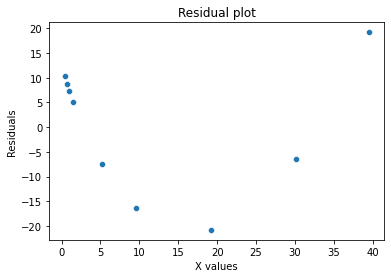

In [108]:
# Importing Seaborn
import seaborn as sns

# Creating plot
fig = sns.scatterplot(x=Xs, y=residuals)
 
# Adding labels to the axis and label to the plot
fig.set(xlabel ="X values", ylabel = "Residuals", title ='Residual plot');

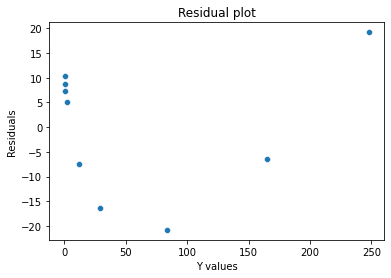

In [109]:
# Importing Seaborn
import seaborn as sns

# Creating plot
fig = sns.scatterplot(x=Ys, y=residuals)
 
# Adding labels to the axis and label to the plot
fig.set(xlabel ="Y values", ylabel = "Residuals", title ='Residual plot');

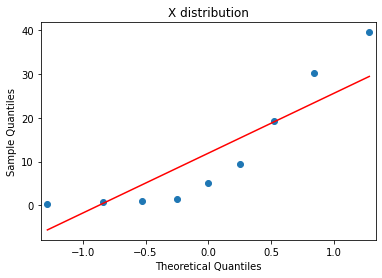

In [111]:
# Importing matplotlib pyplot
import matplotlib.pyplot as plt

# Importing statsmodels lib
import statsmodels.api as sm

# Creating a QQ-plot
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

In [122]:
# Creating Xs array
Xs = np.log(np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ]))

# Creating Ys array
Ys = np.log(np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ]))

# Storing the number of points
n = Xs.shape[0]

# Calculating Xs mean
Xs_mu = Xs.mean()

# Calculating Ys mean
Ys_mu = Ys.mean()

# Calculating Xs standard deviation
Xs_std = np.sqrt(np.sum((Xs-Xs.mean())**2)/(n-1))

# Calculating Ys standard deviation
Ys_std = np.sqrt(np.sum((Ys-Ys.mean())**2)/(n-1))

# Standard Xs
Xs_z = (Xs - Xs_mu)/Xs_std

# Standard Ys
Ys_z = (Ys - Ys_mu)/Ys_std

# Covariance between Xs and Ys
CovXY = np.sum((Xs-Xs.mean())*(Ys-Ys.mean()))/(n-1)

# Correlation between Xs and Ys
rXY = np.sum(Xs_z*Ys_z)/(n-1)

# Calculating beta_1
beta_1 = rXY*(Ys_std/Xs_std)

# Calculating beta_0
beta_0 = Ys_mu - beta_1*Xs_mu

# Calculating residuals
residuals = Ys - (beta_1*Xs + beta_0)

results = f"""
Xs mean: {Xs_mu} AU
Ys mean: {Ys_mu} year
Xs standard deviation: {Xs_std} AU
Ys standard deviation: {Ys_std} year
Covariance between Xs and Ys: {CovXY} AU year
Correlation between Xs and Ys: {rXY} unitless
Beta1: {beta_1}
Beta0: {beta_0}
"""

print(results)


Xs mean: 1.4538802139806306 AU
Ys mean: 2.181477789171877 year
Xs standard deviation: 1.7248419253757807 AU
Ys standard deviation: 2.586457153139843 year
Covariance between Xs and Ys: 4.461228881643748 AU year
Correlation between Xs and Ys: 0.9999998085102114 unitless
Beta1: 1.4995325773381893
Beta0: 0.0013370447605036695



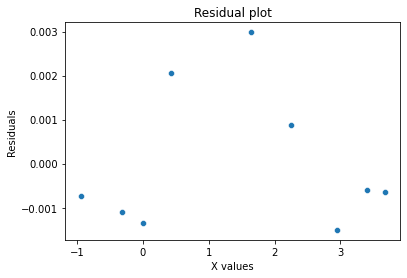

In [123]:
# Importing Seaborn
import seaborn as sns

# Creating plot
fig = sns.scatterplot(x=Xs, y=residuals)
 
# Adding labels to the axis and label to the plot
fig.set(xlabel ="Log X values", ylabel = "Residuals", title ='Residual plot');

In [4]:
# Importing Libraries
import numpy as np

# Defining data
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [21]:
# Creating X vector
X = np.concatenate([
    np.ones(shape=(N,1)), 
    LogPlanetRadius.reshape(N,1),
    LogPlanetOrbit.reshape(N,1),
    StarMetallicity.reshape(N,1),
    LogStarMass.reshape(N,1),
    LogStarAge.reshape(N,1)
], axis=1)

# Creating y vector
y = LogPlanetMass.reshape(N,1)

# Calculating Beta
beta = np.linalg.inv(X.T@X)@X.T@y

# Printing Beta
print(beta[:,0])

[ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]


In [46]:
# Calculating sigma hat
sigma_hat = np.sqrt(np.sum(((y - X@beta)**2)/(N-X.shape[1])))

# Calculating Sigma vector
Sigma_vec = np.sqrt(np.linalg.inv(X.T@X).diagonal()).reshape(X.shape[1], 1)

# Calculating T-statistics
T_vec = beta/(sigma_hat*Sigma_vec)

# Features
features_name = ['intercept', 'LogPlanetRadius', 'LogPlanetOrbit', 'StarMetallicity', 'LogStarMass', 'LogStarAge']

# Printing Beta
print([f"{feature}: {round(value,3)}" for feature, value in zip(features_name, T_vec[:,0])])

['intercept: 0.111', 'LogPlanetRadius: 4.895', 'LogPlanetOrbit: -0.392', 'StarMetallicity: -1.279', 'LogStarMass: -0.856', 'LogStarAge: -1.243']
